In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model

In [2]:
df = pd.read_csv('Bakery Sales.csv')
pd.set_option('display.max_columns',30)

In [3]:
df

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(columns=['place','croque monsieur','mad garlic'], inplace=True)

In [5]:
df.dropna(axis=0,how='all',inplace=True)

In [6]:
df.drop(2653,inplace=True)

In [7]:
df.fillna(0,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 2419
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2420 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   angbutter           2420 non-null   float64
 4   plain bread         2420 non-null   float64
 5   jam                 2420 non-null   float64
 6   americano           2420 non-null   float64
 7   croissant           2420 non-null   float64
 8   caffe latte         2420 non-null   float64
 9   tiramisu croissant  2420 non-null   float64
 10  cacao deep          2420 non-null   float64
 11  pain au chocolat    2420 non-null   float64
 12  almond croissant    2420 non-null   float64
 13  milk tea            2420 non-null   float64
 14  gateau chocolat     2420 non-null   float64
 15  pandoro             2420 non-null   float64
 16  cheese

# Sum of all Products

In [9]:
df.sum()

datetime              2019-07-11 15:352019-07-11 16:102019-07-12 11:...
day of week           ThurThurFriSatSatSatSatSatSatSatSunSunSunSunSu...
total                                                        51237500.0
angbutter                                                        3229.0
plain bread                                                      1028.0
jam                                                               249.0
americano                                                         513.0
croissant                                                        1049.0
caffe latte                                                       214.0
tiramisu croissant                                                945.0
cacao deep                                                        364.0
pain au chocolat                                                  726.0
almond croissant                                                  235.0
milk tea                                                        

In [10]:
sum_df = pd.DataFrame(df.sum(), columns=['sum'])
sum_df

,sum
datetime,2019-07-11 15:352019-07-11 16:102019-07-12 11:...
day of week,ThurThurFriSatSatSatSatSatSatSatSunSunSunSunSu...
total,51237500.0
angbutter,3229.0
plain bread,1028.0
jam,249.0
americano,513.0
croissant,1049.0
caffe latte,214.0
tiramisu croissant,945.0


In [11]:
sum_df.reset_index(inplace=True)
sum_df.drop([0,1,2], inplace=True)

In [12]:
sum_df.reset_index(inplace=True)

In [13]:
sum_df

,level_0,index,sum
0,3,angbutter,3229.0
1,4,plain bread,1028.0
2,5,jam,249.0
3,6,americano,513.0
4,7,croissant,1049.0
5,8,caffe latte,214.0
6,9,tiramisu croissant,945.0
7,10,cacao deep,364.0
8,11,pain au chocolat,726.0
9,12,almond croissant,235.0


In [14]:
sum_df.rename(columns={'index':'product','sum': 'No. of Orders'},inplace=True)

In [15]:
sum_df.drop(columns='level_0',inplace=True)

In [16]:
sum_df.sort_values(by='No. of Orders',ascending=False,inplace=True)

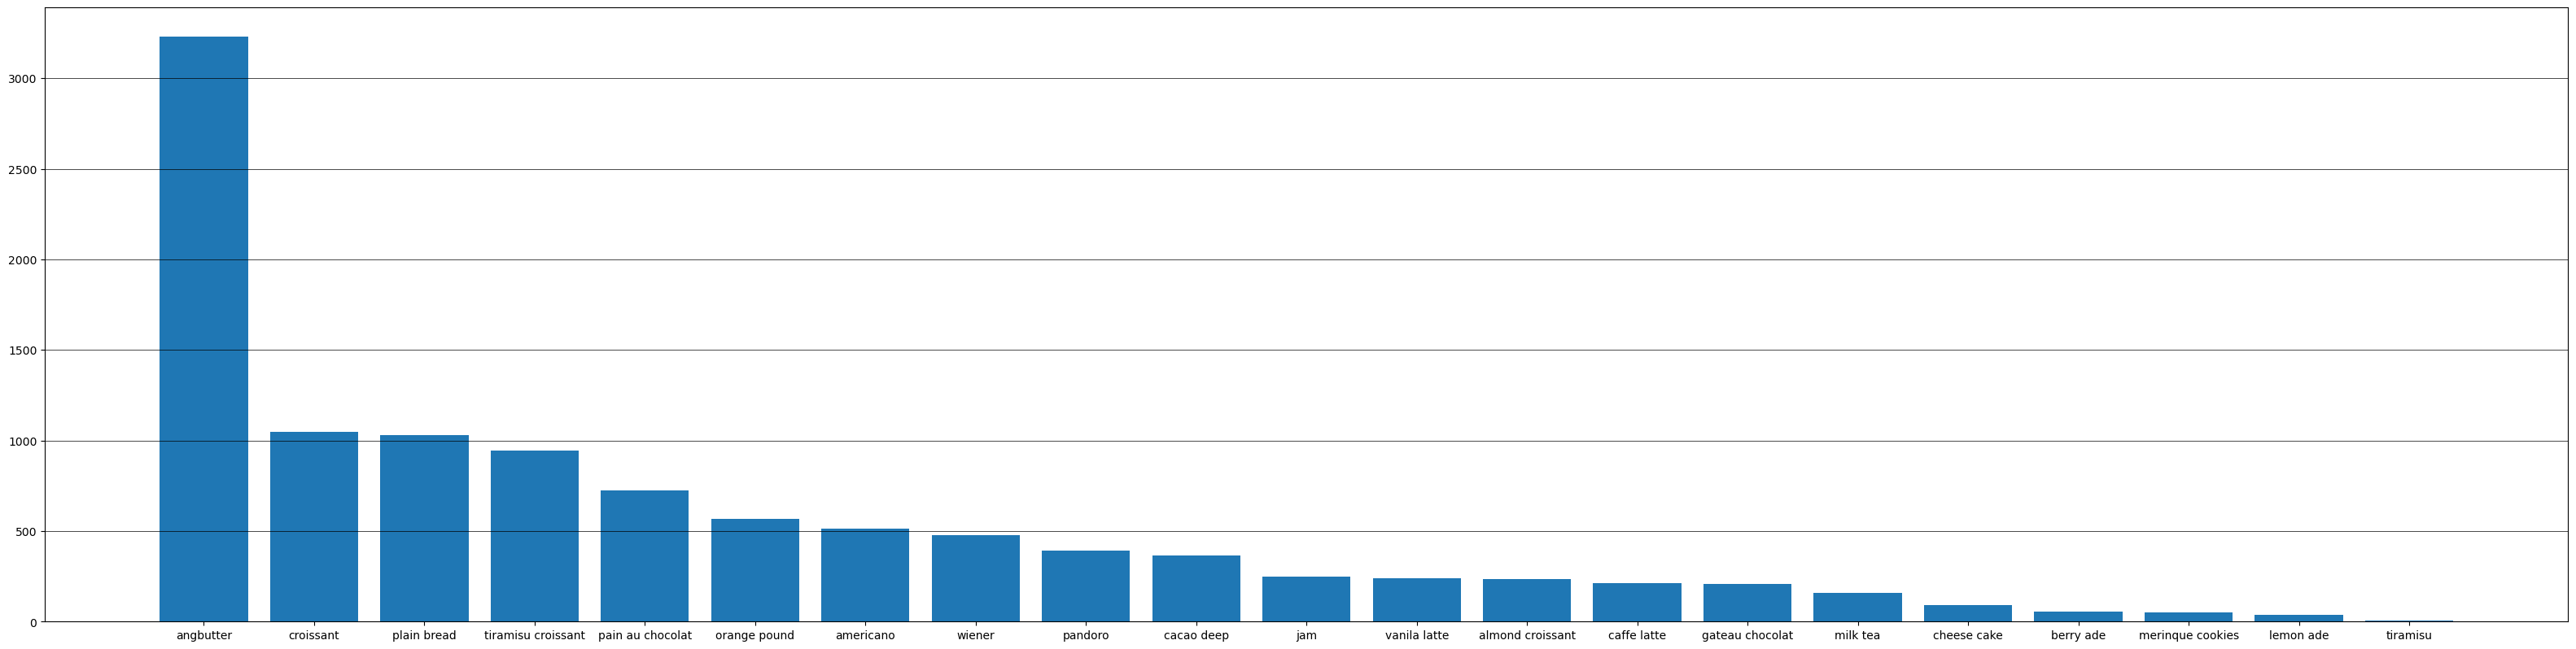

In [17]:
#right-click then click "Open image in new tab" to see the full details and quality of the image.

plt.figure(figsize=(40,10),dpi=100)
x = sum_df['product']
y = sum_df['No. of Orders']
plt.bar(x,y)
plt.grid(True,color='black',linestyle='-',linewidth=0.5, axis='y')
plt.show()

In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [19]:
df.dtypes

datetime              datetime64[ns]
day of week                   object
total                        float64
angbutter                    float64
plain bread                  float64
jam                          float64
americano                    float64
croissant                    float64
caffe latte                  float64
tiramisu croissant           float64
cacao deep                   float64
pain au chocolat             float64
almond croissant             float64
milk tea                     float64
gateau chocolat              float64
pandoro                      float64
cheese cake                  float64
lemon ade                    float64
orange pound                 float64
wiener                       float64
vanila latte                 float64
berry ade                    float64
tiramisu                     float64
merinque cookies             float64
dtype: object

In [20]:
df['datetime'].max() - df['datetime'].min()

Timedelta('295 days 23:10:00')

# Sales Visualization

In [21]:
df2 = df.set_index('datetime')

In [22]:
df2

,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
datetime,,,,,,,,,,,,,,,,,,,,,,,
2019-07-11 15:35:00,Thur,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-07-11 16:10:00,Thur,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-07-12 11:49:00,Fri,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-13 13:19:00,Sat,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-07-13 13:22:00,Sat,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-02 11:37:00,Sat,19500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-05-02 11:39:00,Sat,19800.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-05-02 12:15:00,Sat,14300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#M - by end of the month
df2['total'].resample('M').sum()

datetime
2019-07-31    4076500.0
2019-08-31    6100500.0
2019-09-30    4895500.0
2019-10-31    3959100.0
2019-11-30    4543000.0
2019-12-31    5009500.0
2020-01-31    4582500.0
2020-02-29    6423700.0
2020-03-31    6445100.0
2020-04-30    4893700.0
2020-05-31     308400.0
Freq: M, Name: total, dtype: float64

In [24]:
month_plot = df2['total'].resample('M').sum()

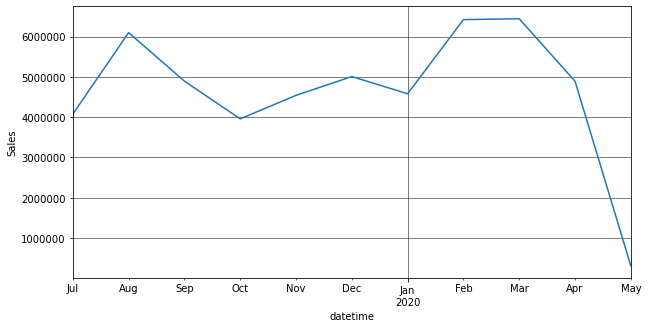

In [25]:
#plt.ticklabel_format(style='plain') converts the exponential number to a numeric.
#plt.ticklabel_format(style='plain') should be coded before .plot

plt.figure(figsize =(10,5))
plt.ticklabel_format(style='plain')
month_plot.plot()
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.ylabel('Sales')
plt.show()

In [26]:
month_plot.describe()

count    1.100000e+01
mean     4.657955e+06
std      1.685001e+06
min      3.084000e+05
25%      4.309750e+06
50%      4.893700e+06
75%      5.555000e+06
max      6.445100e+06
Name: total, dtype: float64

In [27]:
#W - by end of the week.
df2['total'].resample('W').sum()

datetime
2019-07-14     427000.0
2019-07-21     701100.0
2019-07-28    2529900.0
2019-08-04    1331900.0
2019-08-11    1469900.0
2019-08-18    1357100.0
2019-08-25    1377200.0
2019-09-01    1225100.0
2019-09-08    1146900.0
2019-09-15    1062000.0
2019-09-22    1251100.0
2019-09-29    1079700.0
2019-10-06     819500.0
2019-10-13     858300.0
2019-10-20    1012200.0
2019-10-27    1072000.0
2019-11-03     865100.0
2019-11-10    1249000.0
2019-11-17     988400.0
2019-11-24     830500.0
2019-12-01    1216600.0
2019-12-08    1313200.0
2019-12-15     981800.0
2019-12-22    1089100.0
2019-12-29    1091200.0
2020-01-05    1113900.0
2020-01-12    1223700.0
2020-01-19    1060400.0
2020-01-26     713300.0
2020-02-02    1225800.0
2020-02-09    1464900.0
2020-02-16    1298900.0
2020-02-23    1800900.0
2020-03-01    1746100.0
2020-03-08    1651000.0
2020-03-15    1296700.0
2020-03-22    1522700.0
2020-03-29    1352700.0
2020-04-05    1265700.0
2020-04-12    1084300.0
2020-04-19     915400.0
2020-04

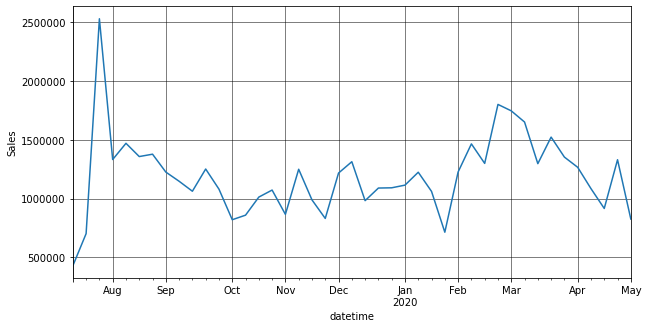

In [28]:
week_plot = df2['total'].resample('W').sum()

plt.figure(figsize =(10,5))
plt.ticklabel_format(style='plain')
week_plot.plot()
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.ylabel('Sales')
plt.show()

In [29]:
week_plot.describe()

count    4.300000e+01
mean     1.191570e+06
std      3.482054e+05
min      4.270000e+05
25%      1.000300e+06
50%      1.216600e+06
75%      1.331000e+06
max      2.529900e+06
Name: total, dtype: float64

# Max number of orders by Month and Year

In [30]:
df3 = df.copy()
df3 = df.set_index('datetime')
list1 = []
for product in df3.columns:
    if (product != 'datetime') & (product != 'day of week') & (product != 'total'):
        list1.append(product)

In [31]:
list1

['angbutter',
 'plain bread',
 'jam',
 'americano',
 'croissant',
 'caffe latte',
 'tiramisu croissant',
 'cacao deep',
 'pain au chocolat',
 'almond croissant',
 'milk tea',
 'gateau chocolat',
 'pandoro',
 'cheese cake',
 'lemon ade',
 'orange pound',
 'wiener',
 'vanila latte',
 'berry ade',
 'tiramisu',
 'merinque cookies']

In [32]:
#make sure that the index is datetime before using resample

df3 = df3[list1].resample('M').sum()
df3.reset_index(inplace=True)

In [33]:
df3

,datetime,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-31,187.0,40.0,9.0,26.0,80.0,7.0,65.0,7.0,47.0,20.0,10.0,19.0,27.0,0.0,5.0,34.0,24.0,18.0,6.0,5.0,0.0
1,2019-08-31,430.0,105.0,32.0,46.0,151.0,27.0,77.0,18.0,101.0,38.0,16.0,32.0,64.0,0.0,5.0,57.0,98.0,23.0,9.0,2.0,9.0
2,2019-09-30,337.0,79.0,21.0,44.0,113.0,16.0,76.0,52.0,79.0,25.0,17.0,36.0,35.0,0.0,1.0,51.0,56.0,20.0,5.0,0.0,8.0
3,2019-10-31,249.0,71.0,26.0,43.0,92.0,17.0,68.0,30.0,80.0,26.0,6.0,12.0,30.0,2.0,4.0,43.0,42.0,27.0,2.0,0.0,2.0
4,2019-11-30,288.0,116.0,36.0,40.0,92.0,29.0,78.0,32.0,62.0,15.0,19.0,10.0,35.0,16.0,6.0,50.0,39.0,26.0,2.0,0.0,3.0
5,2019-12-31,314.0,101.0,27.0,65.0,89.0,26.0,117.0,39.0,67.0,22.0,22.0,14.0,25.0,16.0,1.0,61.0,45.0,16.0,4.0,0.0,3.0
6,2020-01-31,300.0,97.0,23.0,44.0,79.0,15.0,99.0,39.0,46.0,16.0,18.0,16.0,45.0,17.0,3.0,52.0,42.0,17.0,7.0,0.0,4.0
7,2020-02-29,391.0,137.0,29.0,86.0,128.0,19.0,111.0,46.0,79.0,33.0,27.0,26.0,55.0,18.0,4.0,86.0,48.0,42.0,8.0,0.0,7.0
8,2020-03-31,403.0,172.0,31.0,67.0,120.0,38.0,132.0,51.0,91.0,21.0,18.0,23.0,40.0,13.0,4.0,74.0,35.0,34.0,8.0,0.0,4.0
9,2020-04-30,311.0,105.0,15.0,47.0,99.0,18.0,113.0,48.0,69.0,17.0,7.0,22.0,38.0,8.0,5.0,54.0,46.0,17.0,3.0,0.0,8.0


In [34]:
list2 = []
for product in list1:
    df5 = df3.groupby('datetime', as_index = False)[product].max()
    df5 = df5.sort_values(by=product, ascending=False)
    list2.append(df5['datetime'].iloc[0])


In [35]:
list2

[Timestamp('2019-08-31 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2019-11-30 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2019-09-30 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2019-09-30 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2019-11-30 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2019-07-31 00:00:00'),
 Timestamp('2019-08-31 00:00:00')]

In [36]:
df4 = df.set_index('datetime')
# df4['Date'] = list2

In [37]:
#make sure that the index is datetime before using resample

a = df4[list1].resample('M').sum().max()

In [38]:
a

angbutter             430.0
plain bread           172.0
jam                    36.0
americano              86.0
croissant             151.0
caffe latte            38.0
tiramisu croissant    132.0
cacao deep             52.0
pain au chocolat      101.0
almond croissant       38.0
milk tea               27.0
gateau chocolat        36.0
pandoro                64.0
cheese cake            18.0
lemon ade               6.0
orange pound           86.0
wiener                 98.0
vanila latte           42.0
berry ade               9.0
tiramisu                5.0
merinque cookies        9.0
dtype: float64

In [39]:
df4 = pd.DataFrame(a, columns=['sum'])

In [40]:
df4.reset_index(inplace=True)

In [41]:
df4

,index,sum
0,angbutter,430.0
1,plain bread,172.0
2,jam,36.0
3,americano,86.0
4,croissant,151.0
5,caffe latte,38.0
6,tiramisu croissant,132.0
7,cacao deep,52.0
8,pain au chocolat,101.0
9,almond croissant,38.0


In [42]:
df4['Date'] = list2

In [43]:
df4.rename(columns ={'index':'Product','sum':'No. of Orders'}, inplace = True)

In [44]:
df4['Date'] = pd.to_datetime(df4['Date'])

In [45]:
df4['Date'] = df4['Date'].dt.strftime('%B %Y')

In [46]:
#Max number of orders by Month and Year.
df4

,Product,No. of Orders,Date
0,angbutter,430.0,August 2019
1,plain bread,172.0,March 2020
2,jam,36.0,November 2019
3,americano,86.0,February 2020
4,croissant,151.0,August 2019
5,caffe latte,38.0,March 2020
6,tiramisu croissant,132.0,March 2020
7,cacao deep,52.0,September 2019
8,pain au chocolat,101.0,August 2019
9,almond croissant,38.0,August 2019


# Linear Regression

In [47]:
try_df = df2.resample('M').sum()

In [48]:
try_df

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
datetime,,,,,,,,,,,,,,,,,,,,,,
2019-07-31,4076500.0,187.0,40.0,9.0,26.0,80.0,7.0,65.0,7.0,47.0,20.0,10.0,19.0,27.0,0.0,5.0,34.0,24.0,18.0,6.0,5.0,0.0
2019-08-31,6100500.0,430.0,105.0,32.0,46.0,151.0,27.0,77.0,18.0,101.0,38.0,16.0,32.0,64.0,0.0,5.0,57.0,98.0,23.0,9.0,2.0,9.0
2019-09-30,4895500.0,337.0,79.0,21.0,44.0,113.0,16.0,76.0,52.0,79.0,25.0,17.0,36.0,35.0,0.0,1.0,51.0,56.0,20.0,5.0,0.0,8.0
2019-10-31,3959100.0,249.0,71.0,26.0,43.0,92.0,17.0,68.0,30.0,80.0,26.0,6.0,12.0,30.0,2.0,4.0,43.0,42.0,27.0,2.0,0.0,2.0
2019-11-30,4543000.0,288.0,116.0,36.0,40.0,92.0,29.0,78.0,32.0,62.0,15.0,19.0,10.0,35.0,16.0,6.0,50.0,39.0,26.0,2.0,0.0,3.0
2019-12-31,5009500.0,314.0,101.0,27.0,65.0,89.0,26.0,117.0,39.0,67.0,22.0,22.0,14.0,25.0,16.0,1.0,61.0,45.0,16.0,4.0,0.0,3.0
2020-01-31,4582500.0,300.0,97.0,23.0,44.0,79.0,15.0,99.0,39.0,46.0,16.0,18.0,16.0,45.0,17.0,3.0,52.0,42.0,17.0,7.0,0.0,4.0
2020-02-29,6423700.0,391.0,137.0,29.0,86.0,128.0,19.0,111.0,46.0,79.0,33.0,27.0,26.0,55.0,18.0,4.0,86.0,48.0,42.0,8.0,0.0,7.0
2020-03-31,6445100.0,403.0,172.0,31.0,67.0,120.0,38.0,132.0,51.0,91.0,21.0,18.0,23.0,40.0,13.0,4.0,74.0,35.0,34.0,8.0,0.0,4.0


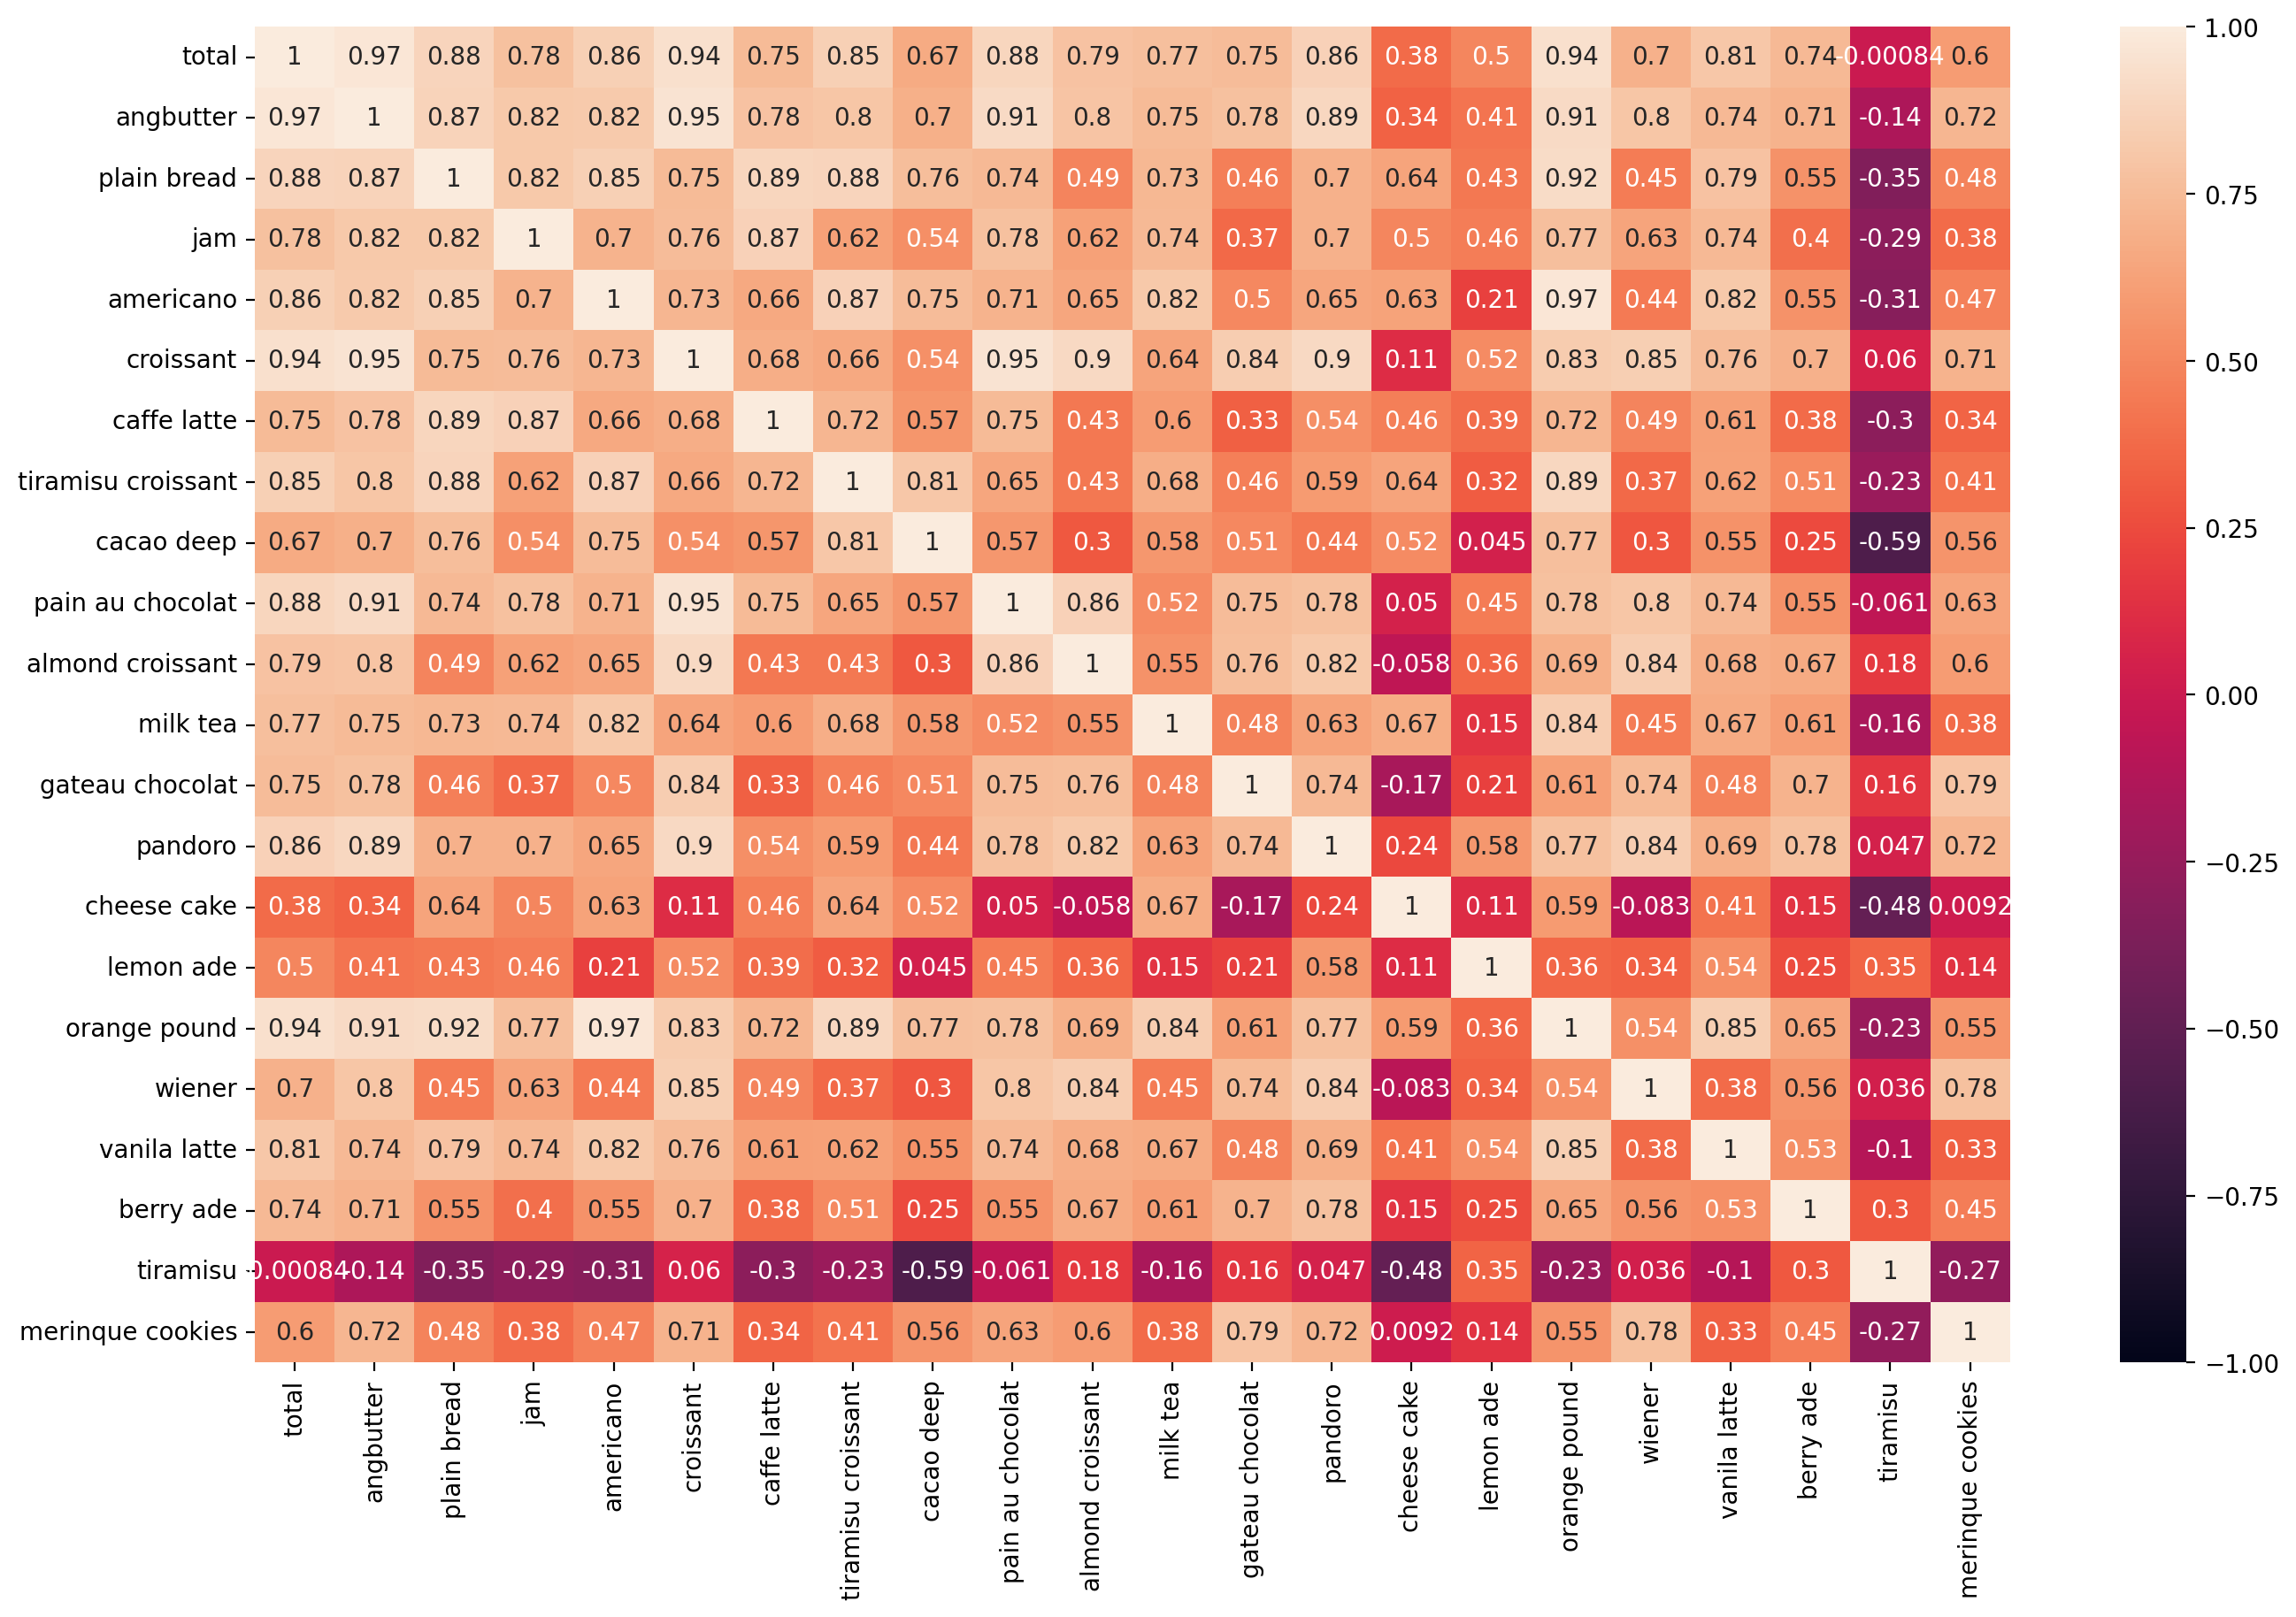

In [49]:
#Heatmap shows the tiramisu has no relationship with total sales due to low sales based on the try_df dataframe.

corrMatrix = try_df.corr()
plt.figure(figsize =(16,10),dpi=200)
#vmin and vmax - scaling from 1 to -1
sn.heatmap(corrMatrix, annot=True,vmin=-1,vmax=1)
plt.show()

In [50]:
x2 = try_df.drop(['total','tiramisu'],axis=1)
y2 = try_df['total']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x2,y2,test_size=0.3)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

y_pred = reg.predict(X_test)
y_pred

array([5999277.05380183,  599513.79243135, 6136887.02000548,
       2999987.22793916])

In [51]:
X_test

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,merinque cookies
datetime,,,,,,,,,,,,,,,,,,,,
2019-08-31,430.0,105.0,32.0,46.0,151.0,27.0,77.0,18.0,101.0,38.0,16.0,32.0,64.0,0.0,5.0,57.0,98.0,23.0,9.0,9.0
2020-05-31,19.0,5.0,0.0,5.0,6.0,2.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0
2020-02-29,391.0,137.0,29.0,86.0,128.0,19.0,111.0,46.0,79.0,33.0,27.0,26.0,55.0,18.0,4.0,86.0,48.0,42.0,8.0,7.0
2019-07-31,187.0,40.0,9.0,26.0,80.0,7.0,65.0,7.0,47.0,20.0,10.0,19.0,27.0,0.0,5.0,34.0,24.0,18.0,6.0,0.0


In [52]:
# A high r2 and rmse value decribes that the regression is good.
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred)
r2,rmse

(0.9436552652109057, 334033689721.0655)

### Trying sample data of product for the created model

In [53]:
#use double square bracket for reg.predict([[]])

"""
giving quantities for each product to predict the total cost.
[angbutter	plain bread	jam	americano	croissant	caffe latte	tiramisu croissant	cacao deep	pain au chocolat	almond croissant	milk tea	gateau chocolat	pandoro	cheese cake	lemon ade	orange pound
wiener	vanila latte	berry ade	merinque cookies]"""

sample_data = np.array([[300,120,30,80,119,30,111,48,51,24,40,89,22,48,2,50,53,88,44,30]])

In [54]:
sample_predicted_cost = reg.predict(sample_data)

In [55]:
print(f'The sample data costs {sample_predicted_cost}.'.replace('[','').replace(']',''))

The sample data costs 5111592.15768083.
